In [ ]:
from google.colab import drive
drive.mount("/content/drive")

Mounted at /content/drive


In [ ]:
%cd "/content/drive/Shareddrives/41043-42850-nlp"

/content/drive/Shareddrives/41043-42850-nlp


In [ ]:
# A dependency of the preprocessing for BERT inputs
!pip install -q -U "tensorflow-text==2.8.*"

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.9/4.9 MB 13.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 498.1/498.1 MB 1.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 42.6/42.6 kB 4.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.1/1.1 MB 37.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.8/5.8 MB 72.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 462.3/462.3 kB 23.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.4/1.4 MB 53.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.9/4.9 MB 84.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 781.3/781.3 kB 53.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.7/1.7 MB 66.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.7/1.7 MB 51.8 MB/s eta 0:00:00
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behavio

In [ ]:
!pip install -q tf-models-official==2.7.0

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.8/1.8 MB 9.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 106.7/106.7 kB 11.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 43.6/43.6 kB 4.7 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 611.8/611.8 kB 12.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 242.5/242.5 kB 11.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.0/5.0 MB 12.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.4/5.4 MB 26.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.4/5.4 MB 22.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.4/5.4 MB 27.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 53.3/53.3 kB 3.2 MB/s eta 0:00:00


In [ ]:
import os

import tensorflow as tf
import tensorflow_hub as hub
import tensorflow_text as text
from official.nlp import optimization  # to create AdamW optimizer

import numpy as np

tf.get_logger().setLevel('ERROR')

/usr/local/lib/python3.10/dist-packages/tensorflow_addons/utils/tfa_eol_msg.py:23: UserWarning: 

TensorFlow Addons (TFA) has ended development and introduction of new features.
TFA has entered a minimal maintenance and release mode until a planned end of life in May 2024.
Please modify downstream libraries to take dependencies from other repositories in our TensorFlow community (e.g. Keras, Keras-CV, and Keras-NLP). 

For more information see: https://github.com/tensorflow/addons/issues/2807 

  warnings.warn(
/usr/local/lib/python3.10/dist-packages/tensorflow_addons/utils/ensure_tf_install.py:53: UserWarning: Tensorflow Addons supports using Python ops for all Tensorflow versions above or equal to 2.13.0 and strictly below 2.16.0 (nightly versions are not supported). 
 The versions of TensorFlow you are currently using is 2.8.4 and is not supported. 
Some things might work, some things might not.
If you were to encounter a bug, do not file an issue.
If you want to make sure you're us

In [ ]:
fullPath = os.path.abspath("pan23-trigger-detection.zip")
datafile = tf.keras.utils.get_file("pan23-trigger-detection.zip", 'file://'+fullPath, extract=True)

1777983488/1777969619 [==============================] - 31s 0us/step


In [ ]:
ls ~/.keras/datasets/pan23-trigger-detection

pan23-trigger-detection-test/   pan23-trigger-detection-validation/
pan23-trigger-detection-train/  readme.md


In [ ]:
print(os.path.dirname(datafile))

/root/.keras/datasets


In [ ]:
# pan23-trigger-detection/
#  -> pan23-trigger-detection-train/
#      -> labels.jsonl
#      -> works.jsonl
#  -> pan23-trigger-detection-valid/
#      -> labels.jsonl
#      -> works.jsonl
#  -> pan23-trigger-detection-test/
#      -> labels.jsonl
#      -> works.jsonl

dataset_dir = os.path.join(os.path.dirname(datafile), 'pan23-trigger-detection')

train_dir = os.path.join(dataset_dir, 'pan23-trigger-detection-train')
valid_dir = os.path.join(dataset_dir, 'pan23-trigger-detection-validation')
test_dir = os.path.join(dataset_dir, 'pan23-trigger-detection-test')

In [ ]:
print(open(os.path.join(valid_dir, 'labels.jsonl')).readline())

{"work_id": "23796682", "labels": ["pornographic-content"]}



In [ ]:
label_names = ['pornographic-content', 'violence', 'death', 'sexual-assault', 'abuse', 'blood', 'suicide', 'pregnancy', 'child-abuse', 'incest', 'underage', 'homophobia', 'self-harm', 'dying', 'kidnapping', 'mental-illness', 'dissection', 'eating-disorders', 'abduction', 'body-hatred', 'childbirth', 'racism', 'sexism', 'miscarriages', 'transphobia', 'abortion', 'fat-phobia', 'animal-death', 'ableism', 'classism', 'misogyny', 'animal-cruelty']

In [ ]:
import json

with open(os.path.join(train_dir, 'labels.jsonl'), 'r') as json_file:
    json_list = list(json_file)

z = {label: 0 for label in label_names}

for json_str in json_list[:len(json_list)]:
    for label in json.loads(json_str)["labels"]:
        z[label] += 1

z_v = list(z.values())
z_v.sort(reverse=True)

print(z_v)

for c in z:
    print(c, z[c])

[238075, 31320, 29114, 22186, 20785, 15099, 13649, 13492, 8904, 8208, 7498, 7183, 5241, 4945, 4482, 4171, 1708, 1365, 1209, 1060, 854, 738, 533, 507, 399, 377, 344, 267, 222, 208, 187, 150]
pornographic-content 238075
violence 29114
death 20785
sexual-assault 31320
abuse 22186
blood 15099
suicide 8208
pregnancy 13649
child-abuse 7183
incest 13492
underage 8904
homophobia 4945
self-harm 5241
dying 7498
kidnapping 4482
mental-illness 4171
dissection 1708
eating-disorders 1209
abduction 1060
body-hatred 1365
childbirth 854
racism 399
sexism 533
miscarriages 507
transphobia 377
abortion 344
fat-phobia 738
animal-death 208
ableism 267
classism 187
misogyny 222
animal-cruelty 150


In [ ]:
import json

with open(os.path.join(train_dir, 'works.jsonl'), 'r') as json_file:
    json_list = list(json_file)

text_ds = [json.loads(json_str)["text"] for json_str in json_list[:len(json_list)//10]]
label_ds = [[json.loads(json_str)["labels"][i] for i in range(32)] for json_str in json_list[:len(json_list)//10]]

train_ds = tf.data.Dataset.from_tensor_slices((text_ds,label_ds))
train_ds = train_ds.shuffle(32).batch(32)

with open(os.path.join(valid_dir, 'works.jsonl'), 'r') as json_file:
    json_list = list(json_file)

text_ds = [json.loads(json_str)["text"] for json_str in json_list[:len(json_list)]]
label_ds = [[json.loads(json_str)["labels"][i] for i in range(32)] for json_str in json_list[:len(json_list)]]

valid_ds = tf.data.Dataset.from_tensor_slices((text_ds,label_ds))
valid_ds = valid_ds.shuffle(32).batch(32)

with open(os.path.join(test_dir, 'works.jsonl'), 'r') as json_file:
    json_list = list(json_file)

text_ds = [json.loads(json_str)["text"] for json_str in json_list[:len(json_list)]]

with open(os.path.join(test_dir, 'labels.jsonl'), 'r') as json_file:
    json_list = list(json_file)

label_ds = []
for json_str in json_list[:len(json_list)]:
    indexes = [label_names.index(c) for c in json.loads(json_str)["labels"]]
    label_ds.append([1 if i in indexes else 0 for i in range(32)])

test_ds = tf.data.Dataset.from_tensor_slices((text_ds,label_ds))
test_ds = test_ds.shuffle(32).batch(32)


In [ ]:
#@title Choose a BERT model to fine-tune

bert_model_name = 'small_bert/bert_en_uncased_L-2_H-128_A-2'  #@param ["bert_en_uncased_L-12_H-768_A-12", "bert_en_cased_L-12_H-768_A-12", "bert_multi_cased_L-12_H-768_A-12", "small_bert/bert_en_uncased_L-2_H-128_A-2", "small_bert/bert_en_uncased_L-2_H-256_A-4", "small_bert/bert_en_uncased_L-2_H-512_A-8", "small_bert/bert_en_uncased_L-2_H-768_A-12", "small_bert/bert_en_uncased_L-4_H-128_A-2", "small_bert/bert_en_uncased_L-4_H-256_A-4", "small_bert/bert_en_uncased_L-4_H-512_A-8", "small_bert/bert_en_uncased_L-4_H-768_A-12", "small_bert/bert_en_uncased_L-6_H-128_A-2", "small_bert/bert_en_uncased_L-6_H-256_A-4", "small_bert/bert_en_uncased_L-6_H-512_A-8", "small_bert/bert_en_uncased_L-6_H-768_A-12", "small_bert/bert_en_uncased_L-8_H-128_A-2", "small_bert/bert_en_uncased_L-8_H-256_A-4", "small_bert/bert_en_uncased_L-8_H-512_A-8", "small_bert/bert_en_uncased_L-8_H-768_A-12", "small_bert/bert_en_uncased_L-10_H-128_A-2", "small_bert/bert_en_uncased_L-10_H-256_A-4", "small_bert/bert_en_uncased_L-10_H-512_A-8", "small_bert/bert_en_uncased_L-10_H-768_A-12", "small_bert/bert_en_uncased_L-12_H-128_A-2", "small_bert/bert_en_uncased_L-12_H-256_A-4", "small_bert/bert_en_uncased_L-12_H-512_A-8", "small_bert/bert_en_uncased_L-12_H-768_A-12", "albert_en_base", "electra_small", "electra_base", "experts_pubmed", "experts_wiki_books", "talking-heads_base"]

map_name_to_handle = {
    'bert_en_uncased_L-12_H-768_A-12':
        'https://tfhub.dev/tensorflow/bert_en_uncased_L-12_H-768_A-12/3',
    'bert_en_cased_L-12_H-768_A-12':
        'https://tfhub.dev/tensorflow/bert_en_cased_L-12_H-768_A-12/3',
    'bert_multi_cased_L-12_H-768_A-12':
        'https://tfhub.dev/tensorflow/bert_multi_cased_L-12_H-768_A-12/3',
    'small_bert/bert_en_uncased_L-2_H-128_A-2':
        'https://tfhub.dev/tensorflow/small_bert/bert_en_uncased_L-2_H-128_A-2/1',
    'small_bert/bert_en_uncased_L-2_H-256_A-4':
        'https://tfhub.dev/tensorflow/small_bert/bert_en_uncased_L-2_H-256_A-4/1',
    'small_bert/bert_en_uncased_L-2_H-512_A-8':
        'https://tfhub.dev/tensorflow/small_bert/bert_en_uncased_L-2_H-512_A-8/1',
    'small_bert/bert_en_uncased_L-2_H-768_A-12':
        'https://tfhub.dev/tensorflow/small_bert/bert_en_uncased_L-2_H-768_A-12/1',
    'small_bert/bert_en_uncased_L-4_H-128_A-2':
        'https://tfhub.dev/tensorflow/small_bert/bert_en_uncased_L-4_H-128_A-2/1',
    'small_bert/bert_en_uncased_L-4_H-256_A-4':
        'https://tfhub.dev/tensorflow/small_bert/bert_en_uncased_L-4_H-256_A-4/1',
    'small_bert/bert_en_uncased_L-4_H-512_A-8':
        'https://tfhub.dev/tensorflow/small_bert/bert_en_uncased_L-4_H-512_A-8/1',
    'small_bert/bert_en_uncased_L-4_H-768_A-12':
        'https://tfhub.dev/tensorflow/small_bert/bert_en_uncased_L-4_H-768_A-12/1',
    'small_bert/bert_en_uncased_L-6_H-128_A-2':
        'https://tfhub.dev/tensorflow/small_bert/bert_en_uncased_L-6_H-128_A-2/1',
    'small_bert/bert_en_uncased_L-6_H-256_A-4':
        'https://tfhub.dev/tensorflow/small_bert/bert_en_uncased_L-6_H-256_A-4/1',
    'small_bert/bert_en_uncased_L-6_H-512_A-8':
        'https://tfhub.dev/tensorflow/small_bert/bert_en_uncased_L-6_H-512_A-8/1',
    'small_bert/bert_en_uncased_L-6_H-768_A-12':
        'https://tfhub.dev/tensorflow/small_bert/bert_en_uncased_L-6_H-768_A-12/1',
    'small_bert/bert_en_uncased_L-8_H-128_A-2':
        'https://tfhub.dev/tensorflow/small_bert/bert_en_uncased_L-8_H-128_A-2/1',
    'small_bert/bert_en_uncased_L-8_H-256_A-4':
        'https://tfhub.dev/tensorflow/small_bert/bert_en_uncased_L-8_H-256_A-4/1',
    'small_bert/bert_en_uncased_L-8_H-512_A-8':
        'https://tfhub.dev/tensorflow/small_bert/bert_en_uncased_L-8_H-512_A-8/1',
    'small_bert/bert_en_uncased_L-8_H-768_A-12':
        'https://tfhub.dev/tensorflow/small_bert/bert_en_uncased_L-8_H-768_A-12/1',
    'small_bert/bert_en_uncased_L-10_H-128_A-2':
        'https://tfhub.dev/tensorflow/small_bert/bert_en_uncased_L-10_H-128_A-2/1',
    'small_bert/bert_en_uncased_L-10_H-256_A-4':
        'https://tfhub.dev/tensorflow/small_bert/bert_en_uncased_L-10_H-256_A-4/1',
    'small_bert/bert_en_uncased_L-10_H-512_A-8':
        'https://tfhub.dev/tensorflow/small_bert/bert_en_uncased_L-10_H-512_A-8/1',
    'small_bert/bert_en_uncased_L-10_H-768_A-12':
        'https://tfhub.dev/tensorflow/small_bert/bert_en_uncased_L-10_H-768_A-12/1',
    'small_bert/bert_en_uncased_L-12_H-128_A-2':
        'https://tfhub.dev/tensorflow/small_bert/bert_en_uncased_L-12_H-128_A-2/1',
    'small_bert/bert_en_uncased_L-12_H-256_A-4':
        'https://tfhub.dev/tensorflow/small_bert/bert_en_uncased_L-12_H-256_A-4/1',
    'small_bert/bert_en_uncased_L-12_H-512_A-8':
        'https://tfhub.dev/tensorflow/small_bert/bert_en_uncased_L-12_H-512_A-8/1',
    'small_bert/bert_en_uncased_L-12_H-768_A-12':
        'https://tfhub.dev/tensorflow/small_bert/bert_en_uncased_L-12_H-768_A-12/1',
    'albert_en_base':
        'https://tfhub.dev/tensorflow/albert_en_base/2',
    'electra_small':
        'https://tfhub.dev/google/electra_small/2',
    'electra_base':
        'https://tfhub.dev/google/electra_base/2',
    'experts_pubmed':
        'https://tfhub.dev/google/experts/bert/pubmed/2',
    'experts_wiki_books':
        'https://tfhub.dev/google/experts/bert/wiki_books/2',
    'talking-heads_base':
        'https://tfhub.dev/tensorflow/talkheads_ggelu_bert_en_base/1',
}

map_model_to_preprocess = {
    'bert_en_uncased_L-12_H-768_A-12':
        'https://tfhub.dev/tensorflow/bert_en_uncased_preprocess/3',
    'bert_en_cased_L-12_H-768_A-12':
        'https://tfhub.dev/tensorflow/bert_en_cased_preprocess/3',
    'small_bert/bert_en_uncased_L-2_H-128_A-2':
        'https://tfhub.dev/tensorflow/bert_en_uncased_preprocess/3',
    'small_bert/bert_en_uncased_L-2_H-256_A-4':
        'https://tfhub.dev/tensorflow/bert_en_uncased_preprocess/3',
    'small_bert/bert_en_uncased_L-2_H-512_A-8':
        'https://tfhub.dev/tensorflow/bert_en_uncased_preprocess/3',
    'small_bert/bert_en_uncased_L-2_H-768_A-12':
        'https://tfhub.dev/tensorflow/bert_en_uncased_preprocess/3',
    'small_bert/bert_en_uncased_L-4_H-128_A-2':
        'https://tfhub.dev/tensorflow/bert_en_uncased_preprocess/3',
    'small_bert/bert_en_uncased_L-4_H-256_A-4':
        'https://tfhub.dev/tensorflow/bert_en_uncased_preprocess/3',
    'small_bert/bert_en_uncased_L-4_H-512_A-8':
        'https://tfhub.dev/tensorflow/bert_en_uncased_preprocess/3',
    'small_bert/bert_en_uncased_L-4_H-768_A-12':
        'https://tfhub.dev/tensorflow/bert_en_uncased_preprocess/3',
    'small_bert/bert_en_uncased_L-6_H-128_A-2':
        'https://tfhub.dev/tensorflow/bert_en_uncased_preprocess/3',
    'small_bert/bert_en_uncased_L-6_H-256_A-4':
        'https://tfhub.dev/tensorflow/bert_en_uncased_preprocess/3',
    'small_bert/bert_en_uncased_L-6_H-512_A-8':
        'https://tfhub.dev/tensorflow/bert_en_uncased_preprocess/3',
    'small_bert/bert_en_uncased_L-6_H-768_A-12':
        'https://tfhub.dev/tensorflow/bert_en_uncased_preprocess/3',
    'small_bert/bert_en_uncased_L-8_H-128_A-2':
        'https://tfhub.dev/tensorflow/bert_en_uncased_preprocess/3',
    'small_bert/bert_en_uncased_L-8_H-256_A-4':
        'https://tfhub.dev/tensorflow/bert_en_uncased_preprocess/3',
    'small_bert/bert_en_uncased_L-8_H-512_A-8':
        'https://tfhub.dev/tensorflow/bert_en_uncased_preprocess/3',
    'small_bert/bert_en_uncased_L-8_H-768_A-12':
        'https://tfhub.dev/tensorflow/bert_en_uncased_preprocess/3',
    'small_bert/bert_en_uncased_L-10_H-128_A-2':
        'https://tfhub.dev/tensorflow/bert_en_uncased_preprocess/3',
    'small_bert/bert_en_uncased_L-10_H-256_A-4':
        'https://tfhub.dev/tensorflow/bert_en_uncased_preprocess/3',
    'small_bert/bert_en_uncased_L-10_H-512_A-8':
        'https://tfhub.dev/tensorflow/bert_en_uncased_preprocess/3',
    'small_bert/bert_en_uncased_L-10_H-768_A-12':
        'https://tfhub.dev/tensorflow/bert_en_uncased_preprocess/3',
    'small_bert/bert_en_uncased_L-12_H-128_A-2':
        'https://tfhub.dev/tensorflow/bert_en_uncased_preprocess/3',
    'small_bert/bert_en_uncased_L-12_H-256_A-4':
        'https://tfhub.dev/tensorflow/bert_en_uncased_preprocess/3',
    'small_bert/bert_en_uncased_L-12_H-512_A-8':
        'https://tfhub.dev/tensorflow/bert_en_uncased_preprocess/3',
    'small_bert/bert_en_uncased_L-12_H-768_A-12':
        'https://tfhub.dev/tensorflow/bert_en_uncased_preprocess/3',
    'bert_multi_cased_L-12_H-768_A-12':
        'https://tfhub.dev/tensorflow/bert_multi_cased_preprocess/3',
    'albert_en_base':
        'https://tfhub.dev/tensorflow/albert_en_preprocess/3',
    'electra_small':
        'https://tfhub.dev/tensorflow/bert_en_uncased_preprocess/3',
    'electra_base':
        'https://tfhub.dev/tensorflow/bert_en_uncased_preprocess/3',
    'experts_pubmed':
        'https://tfhub.dev/tensorflow/bert_en_uncased_preprocess/3',
    'experts_wiki_books':
        'https://tfhub.dev/tensorflow/bert_en_uncased_preprocess/3',
    'talking-heads_base':
        'https://tfhub.dev/tensorflow/bert_en_uncased_preprocess/3',
}

tfhub_handle_encoder = map_name_to_handle[bert_model_name]
tfhub_handle_preprocess = map_model_to_preprocess[bert_model_name]

print(f'BERT model selected           : {tfhub_handle_encoder}')
print(f'Preprocess model auto-selected: {tfhub_handle_preprocess}')

BERT model selected           : https://tfhub.dev/tensorflow/small_bert/bert_en_uncased_L-2_H-128_A-2/1
Preprocess model auto-selected: https://tfhub.dev/tensorflow/bert_en_uncased_preprocess/3


In [ ]:
def build_classifier_model():
  text_input = tf.keras.layers.Input(shape=(), dtype=tf.string, name='text')
  preprocessing_layer = hub.KerasLayer(tfhub_handle_preprocess, name='preprocessing')
  encoder_inputs = preprocessing_layer(text_input)
  encoder = hub.KerasLayer(tfhub_handle_encoder, trainable=True, name='BERT_encoder')
  outputs = encoder(encoder_inputs)
  net = outputs['pooled_output']
  net = tf.keras.layers.Dropout(0.1)(net)
  net = tf.keras.layers.Dense(32, activation=None, name='classifier')(net)
  return tf.keras.Model(text_input, net)

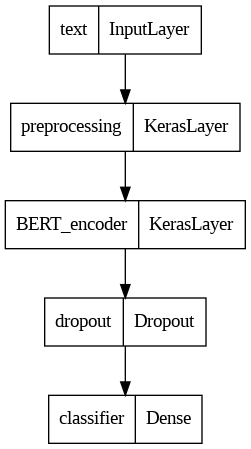

In [ ]:
tf.keras.utils.plot_model(build_classifier_model())

In [ ]:
loss = tf.keras.losses.BinaryCrossentropy(from_logits=True)
metrics = tf.metrics.BinaryAccuracy()

In [ ]:
epochs = 8
steps_per_epoch = tf.data.experimental.cardinality(train_ds).numpy()
num_train_steps = steps_per_epoch * epochs
num_warmup_steps = int(0.1*num_train_steps)

init_lr = 3e-5
optimizer = optimization.create_optimizer(init_lr=init_lr,
                                          num_train_steps=num_train_steps,
                                          num_warmup_steps=num_warmup_steps,
                                          optimizer_type='adamw')

In [ ]:
classifier_model = build_classifier_model()

classifier_model.compile(optimizer=optimizer,
                         loss=loss,
                         metrics=metrics)

In [ ]:
print(f'Training model with {tfhub_handle_encoder}')
history = classifier_model.fit(x=train_ds,
                               validation_data=valid_ds,
                               epochs=epochs,
                               callbacks=[tf.keras.callbacks.ModelCheckpoint('checkpoints/BERTmodel2-checkpoint.keras')])

Training model with https://tfhub.dev/tensorflow/small_bert/bert_en_uncased_L-2_H-128_A-2/1
Epoch 1/8
960/960 [==============================] - 1312s 1s/step - loss: 0.0970 - binary_accuracy: 0.9718 - val_loss: 0.0957 - val_binary_accuracy: 0.9718
Epoch 2/8
960/960 [==============================] - 1297s 1s/step - loss: 0.0957 - binary_accuracy: 0.9720 - val_loss: 0.0957 - val_binary_accuracy: 0.9714
Epoch 3/8
960/960 [==============================] - 1298s 1s/step - loss: 0.0949 - binary_accuracy: 0.9722 - val_loss: 0.0959 - val_binary_accuracy: 0.9715
Epoch 4/8
960/960 [==============================] - 1301s 1s/step - loss: 0.0941 - binary_accuracy: 0.9724 - val_loss: 0.0960 - val_binary_accuracy: 0.9716
Epoch 5/8
960/960 [==============================] - 1285s 1s/step - loss: 0.0933 - binary_accuracy: 0.9725 - val_loss: 0.0960 - val_binary_accuracy: 0.9715
Epoch 6/8
960/960 [==============================] - 1284s 1s/step - loss: 0.0929 - binary_accuracy: 0.9727 - val_loss: 0.0

In [ ]:
classifier_model.save('BERTmodel.keras')

In [ ]:
classifier_model = tf.keras.models.load_model('BERTmodel.keras', custom_objects={"KerasLayer":hub.KerasLayer, "AdamWeightDecay":optimization.AdamWeightDecay})

# Threshold

In [ ]:
def Precision(y_true, y_pred):
    tp = tf.keras.metrics.TruePositives()(y_true, y_pred)
    fp = tf.keras.metrics.FalsePositives()(y_true, y_pred)
    return (tp/(tp + fp)).numpy() if tp+fp !=0 else 0

def Recall(y_true, y_pred):
    tp = tf.keras.metrics.TruePositives()(y_true, y_pred)
    fn = tf.keras.metrics.FalseNegatives()(y_true, y_pred)
    return (tp/(tp + fn)).numpy() if tp+fn !=0 else 0

def F1_score(y_true, y_pred):
    tp = tf.keras.metrics.TruePositives()(y_true, y_pred)
    fp = tf.keras.metrics.FalsePositives()(y_true, y_pred)
    fn = tf.keras.metrics.FalseNegatives()(y_true, y_pred)
    return (tp/(tp + 0.5*(fp+fn))).numpy() if tp+0.5*(fp+fn)!=0 else 0

def Accuracy(y_true, y_pred):
    tp = tf.keras.metrics.TruePositives()(y_true, y_pred)
    tn = tf.keras.metrics.TrueNegatives()(y_true, y_pred)
    fp = tf.keras.metrics.FalsePositives()(y_true, y_pred)
    fn = tf.keras.metrics.FalseNegatives()(y_true, y_pred)
    return ((tp+tn)/(tp+tn+fp+fn)).numpy()


In [ ]:
train_size =  307102
valid_size = 17104
test_size = 17040

In [ ]:
predictions = np.zeros((2,32,valid_size))
data_i = 0
for text_batch, label_batch in valid_ds:
    pred = classifier_model.predict(text_batch)
    pred = tf.sigmoid(pred)
    for i in range(32):
        predictions[0,i,data_i:data_i+len(pred)] = pred[:,i].numpy()
        predictions[1,i,data_i:data_i+len(pred)] = label_batch[:,i].numpy()
    data_i += len(pred)
p = np.copy(predictions)

In [ ]:
thresholds = []
for i in range(32):
    print(i)
    sort_ind = np.argsort(predictions[0,i])
    predictions = predictions[:,:,sort_ind]

    first_1value = np.argwhere(predictions[1,i])[0][0]
    last_0value = np.argwhere(1-predictions[1,i])[-1][0]
    best_f1 = 0
    best_threshold = 0
    best_split_j = 0
    for j in range(0,valid_size,10):
        threshold = (predictions[0,i,j]+predictions[0,i,j+1])/2
        pred = np.ones(valid_size)
        pred[:j+1] = np.zeros(j+1)
        f1 = F1_score(predictions[1,i], pred)
        if f1>best_f1:
            best_f1=f1
            best_threshold = threshold
            best_split_j = j

    thresholds.append(best_threshold)

    j = best_split_j


print(thresholds)


0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
[0.3829149901866913, 0.14613863825798035, 0.1160801500082016, 0.08653770387172699, 0.1096445620059967, 0.1462009698152542, 0.06480590999126434, 0.15354007482528687, 0.08559894561767578, 0.10752777755260468, 0.055606961250305176, 0.03331156075000763, 0.04791173338890076, 0.03906773030757904, 0.03360721468925476, 0.025555357336997986, 0.014494195580482483, 0.01464766263961792, 0.01294390857219696, 0.021921560168266296, 0.017425835132598877, 0.003757461905479431, 0.012240782380104065, 0.012570813298225403, 0.0057335346937179565, 0.008737251162528992, 0.008739873766899109, 0.0015406012535095215, 0.006514295935630798, 0.00442621111869812, 0.004832729697227478, 0.0046357661485672]


# Testing

In [ ]:
p_bin = np.ones((32,valid_size))
for i in range(32):
    p_bin[i] = tf.where(p[0,i] > thresholds[i], 1, 0)

f1 = F1_score(p[1], p_bin)
print(f1)


0.4228622


In [ ]:
predictions = np.zeros((2,32,valid_size))
data_i = 0
for text_batch, label_batch in test_ds:
    pred = classifier_model.predict(text_batch)
    pred = tf.sigmoid(pred)
    for i in range(32):
        predictions[0,i,data_i:data_i+len(pred)] = pred[:,i].numpy()
        predictions[1,i,data_i:data_i+len(pred)] = label_batch[:,i].numpy()
    data_i += len(pred)


In [ ]:
p_bin = np.ones((32,valid_size))
print("Class".rjust(20), "Precision".rjust(10), "Recall".rjust(10), "F1".rjust(10), "Accuracy".rjust(10))
for i in range(32):
    p_bin[i] = predictions[0,i] > thresholds[i]
    print(label_names[i].rjust(20), str(round(Precision(predictions[1,i], p_bin[i]),6)).rjust(10), str(round(Recall(predictions[1,i], p_bin[i]),6)).rjust(10), str(round(F1_score(predictions[1,i], p_bin[i]),6)).rjust(10), str(round(Accuracy(predictions[1,i], p_bin[i]),6)).rjust(10))
f1 = F1_score(predictions[1], p_bin)
print()
print("Overall".rjust(20), str(round(Precision(predictions[1], p_bin),6)).rjust(10), str(round(Recall(predictions[1], p_bin),6)).rjust(10), str(round(F1_score(predictions[1], p_bin),6)).rjust(10), str(round(Accuracy(predictions[1], p_bin),6)).rjust(10))

               Class  Precision     Recall         F1   Accuracy
pornographic-content   0.793385   0.975731   0.875161   0.784729
            violence   0.189808   0.409765    0.25944   0.778707
               death   0.161419   0.421645   0.233461   0.813026
      sexual-assault   0.137478   0.570362   0.221553   0.592025
               abuse   0.136975   0.272506   0.182311   0.823784
               blood   0.198466   0.246722   0.219979   0.914172
             suicide   0.093207   0.258206    0.13697   0.913061
           pregnancy   0.361538   0.123847   0.184495   0.951415
         child-abuse   0.121556     0.1875   0.147493    0.94931
              incest   0.203125   0.225333   0.213654   0.927268
            underage    0.08631   0.234343   0.126156   0.906045
          homophobia   0.034079   0.116364   0.052718   0.932764
           self-harm   0.054264   0.287671   0.091304   0.902245
               dying   0.035278     0.1247   0.054997   0.895522
          kidnapping   0.